# RQ4: Does GPT-4 have a recognizable style for a literature expert when generating creative text without constraints?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
import matplotlib

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

We want to draw with respect to time the ability of reviewers to detect whether a synopsis is written by a human or a machine.

In [2]:
df = pd.read_csv('data/expert_assessment.csv')

In [3]:
def save_plot(ax, user : str):
    ax.set_xlabel('Number of the sinopsis in the time')
    ax.set_ylabel('Authorship Attribution Success')
    yticks = np.arange(0, 1 + 1, 1)
    ax.set_yticks(yticks)
    plt.tight_layout()
    plt.savefig(f'figures/RQ4_acc_{user}.pdf', backend='pgf', bbox_inches='tight', pad_inches=0.1)
    plt.show()

In [4]:
map_autoria = {'Una inteligencia artificial.':'AI', 'Un escritor novel.':'Writer', 'Un escritor consagrado.':'Writer'}
map_writer_en = {'gpt4_en':'AI', 'patricio':'Writer'}
map_writer_es = {'gpt4_es':'AI', 'patricio':'Writer'}

In [5]:
evaluators_en = ['Expert1', 'Expert2', 'Expert3']
evaluators_es = ['Expert4', 'Expert5', 'Expert6']

In [6]:
df['username'].unique()

array(['Expert1', 'Expert2', 'Expert3', 'Expert4', 'Expert5', 'Expert6'],
      dtype=object)

In [7]:
def get_plots_and_means_acc(author):

    df_user_aggr = pd.DataFrame()
    for user in df['username'].unique():
        print (user)
        # we filter users by name
        df_user = copy.copy(df.loc[df.username==user])
        # we map authorship
        df_user['Authorship Attribution'] = df_user['5_authorship_synopsis'].apply(lambda x : map_autoria[x])
        # in the writer's column of the synopsis also
        if user in evaluators_en:
            df_user['Synopsis Origin'] = df_user['synopsis_writer'].apply(lambda x : map_writer_en[x])
        else:
            df_user['Synopsis Origin'] = df_user['synopsis_writer'].apply(lambda x : map_writer_es[x])
        # we create a new column with the voting matches
        df_user['Authorship Attribution Successes'] = df_user['Synopsis Origin']==df_user['Authorship Attribution']
        # we convert the trues to numerics
        df_user['Authorship Attribution Successes'] = df_user['Authorship Attribution Successes'].apply(lambda x: 1 if x else 0)
        # we order by time
        df_user = df_user.sort_values(by='timestamp').reset_index()
        # we filter synopses written by AI only
        df_user = df_user[df_user['Synopsis Origin'] == author]
        df_user_aggr[user.split('@')[0]] = copy.copy(df_user['Authorship Attribution Successes'].tolist())
        if 'mean' in df_user_aggr.columns:
            df_user_aggr = df_user_aggr.drop(columns=['mean'])
        df_user_aggr['mean'] = df_user_aggr.mean(axis=1)
        save_plot(df_user['Authorship Attribution Successes'].plot.line(), user)
    return df_user_aggr 

Expert1


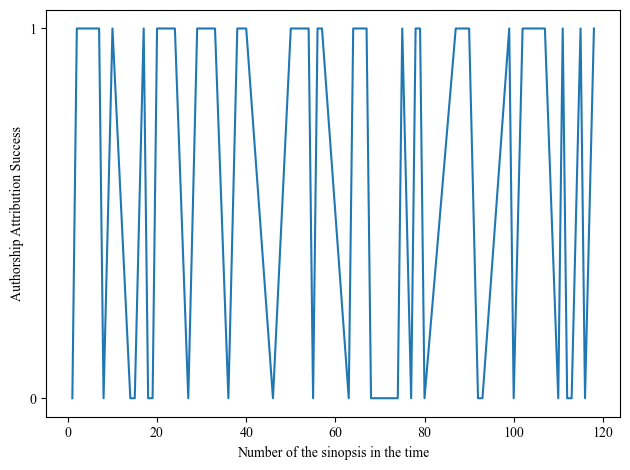

Expert2


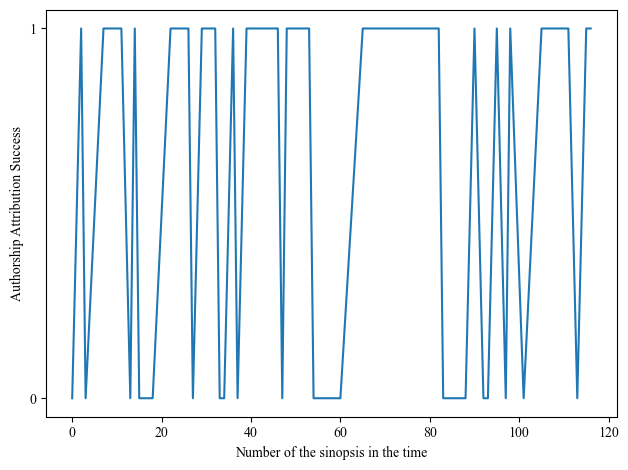

Expert3


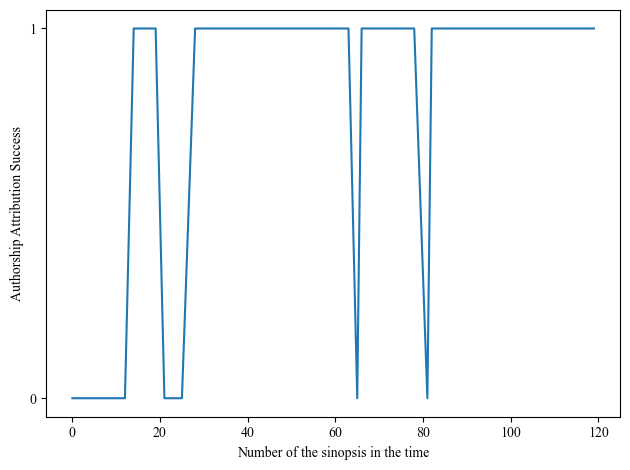

Expert4


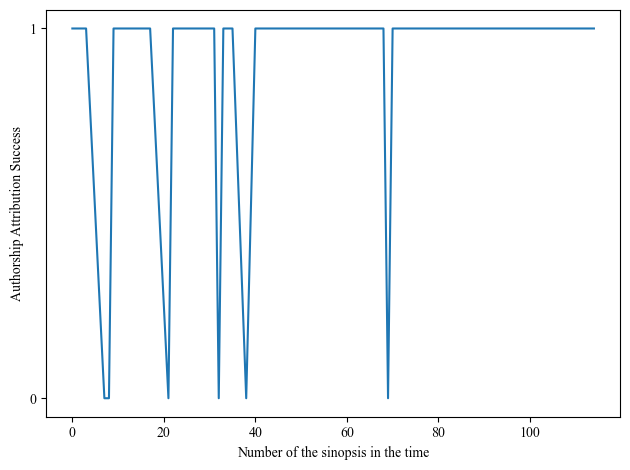

Expert5


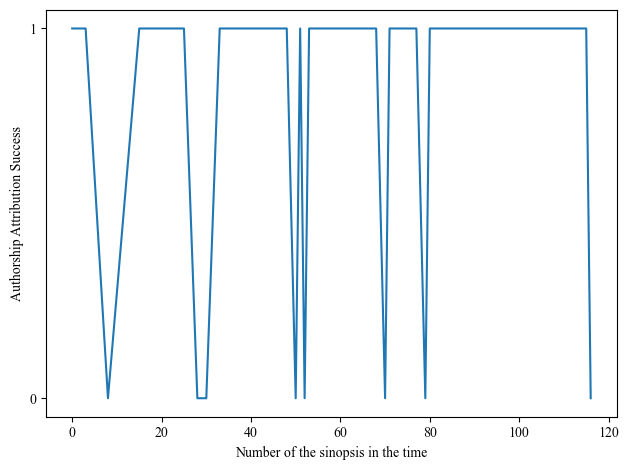

Expert6


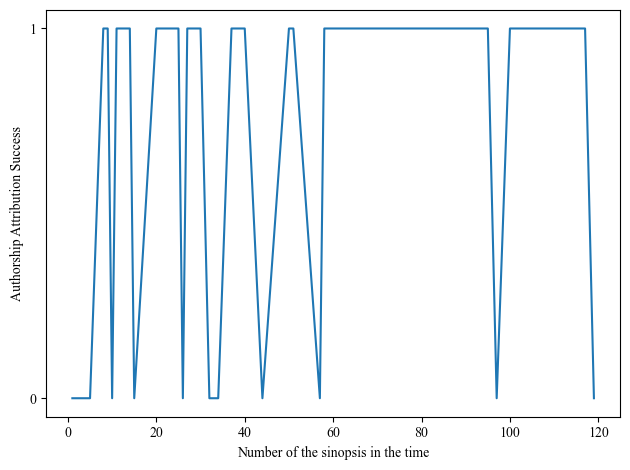

Expert1


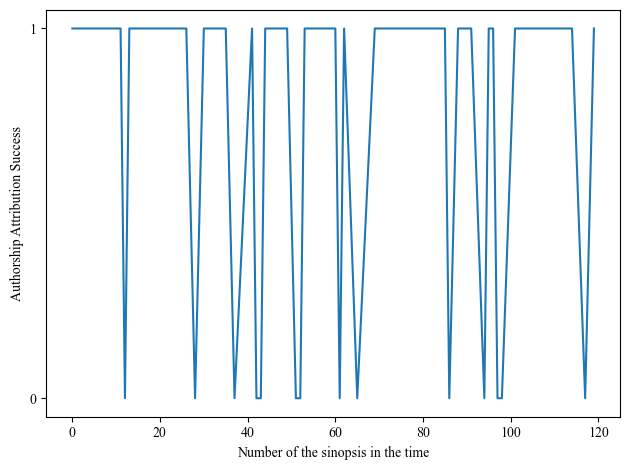

Expert2


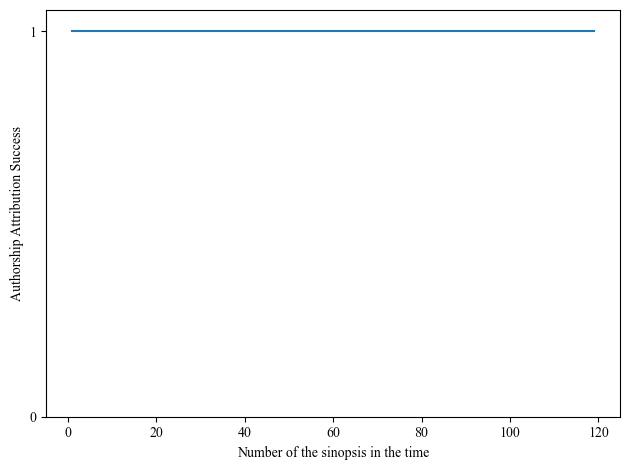

Expert3


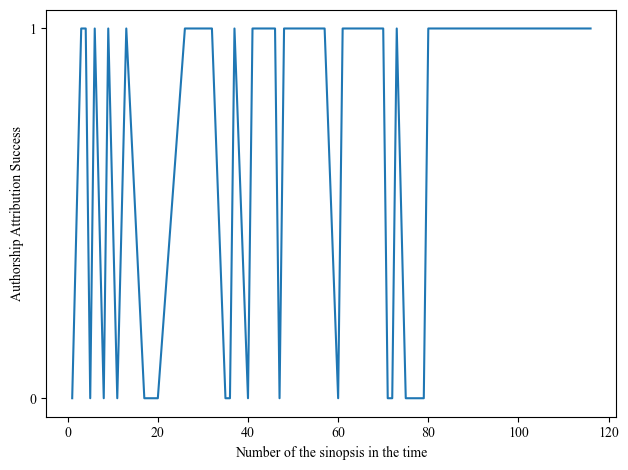

Expert4


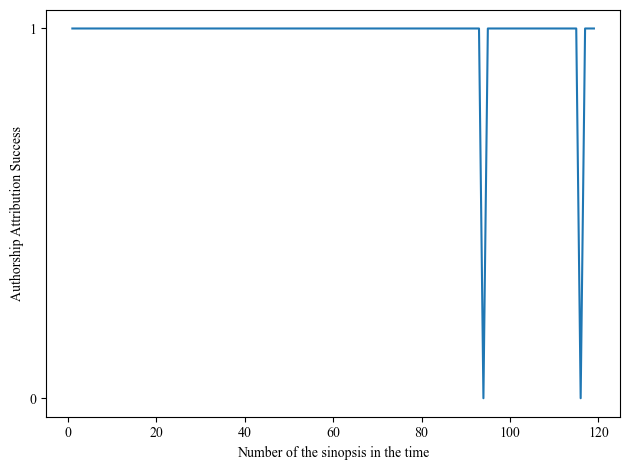

Expert5


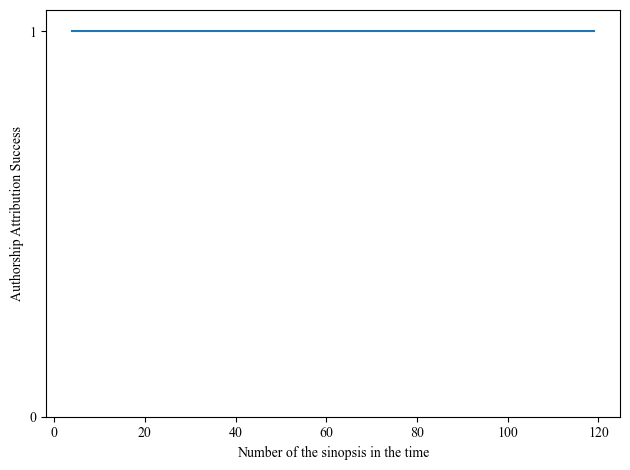

Expert6


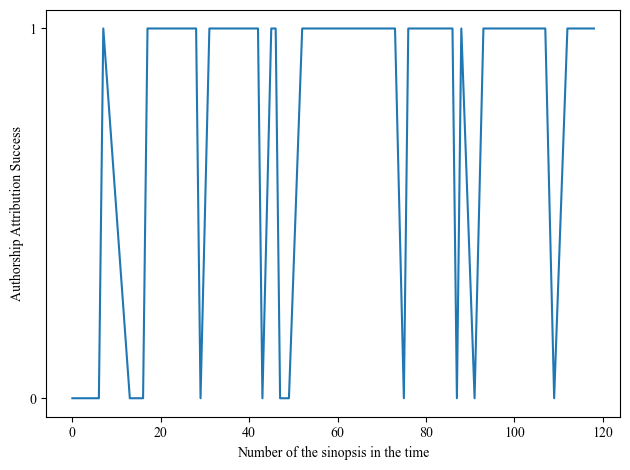

In [8]:
df_user_aggr_IA = get_plots_and_means_acc('AI')
df_user_aggr_Writer = get_plots_and_means_acc('Writer')

In [9]:
df_two_plots = pd.DataFrame()
df_two_plots['AI'] = df_user_aggr_IA['mean']
df_two_plots['Writer'] = df_user_aggr_Writer['mean']

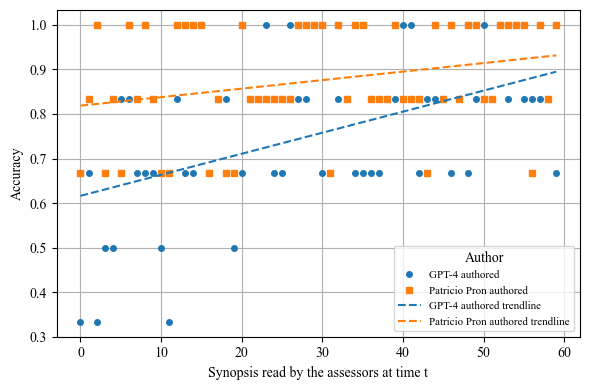

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

accuracy_data = df_two_plots

# Extraer los datos
index = accuracy_data.index
ai_accuracy = accuracy_data['AI']
writer_accuracy = accuracy_data['Writer']

# Crear las líneas de tendencia
z_ai = np.polyfit(index, ai_accuracy, 1)
p_ai = np.poly1d(z_ai)

z_writer = np.polyfit(index, writer_accuracy, 1)
p_writer = np.poly1d(z_writer)

# Colores elegantes para las líneas y los puntos
ai_color = '#1f77b4'  # Azul para AI
writer_color = '#ff7f0e'  # Naranja para Writer

# Plotear los datos como puntos
plt.figure(figsize=(6, 4))
plt.plot(index, ai_accuracy, 'o', label='GPT-4 authored', color=ai_color, markersize=4)
plt.plot(index, writer_accuracy, 's', label='Patricio Pron authored', color=writer_color, markersize=4)

# Plotear las líneas de tendencia
plt.plot(index, p_ai(index), '--', label='GPT-4 authored trendline', color=ai_color, linewidth=1.5)
plt.plot(index, p_writer(index), '--', label='Patricio Pron authored trendline', color=writer_color, linewidth=1.5)

# Agregar etiquetas y título
plt.xlabel('Synopsis read by the assessors at time t', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
#plt.title('Accuracy Comparison with Trendlines', fontsize=12)
plt.legend(fontsize=8, title='Author')
plt.grid(True)

# Ajustar los márgenes para ocupar menos espacio
plt.tight_layout()

# Guardar la figura como PDF
plt.savefig('figures/RQ4_accuracy_comparison.pdf', format='pdf', bbox_inches='tight')

# Mostrar el gráfico
plt.show()
